In [3]:
!pip install opencv-python

     |████████████████████████████████| 46.3 MB 3.1 MB/s eta 0:00:01


In [2]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = 10, 10

In [3]:
path = "/Users/divyansukumar/Desktop/img_red.png"
img = cv2.imread(path)

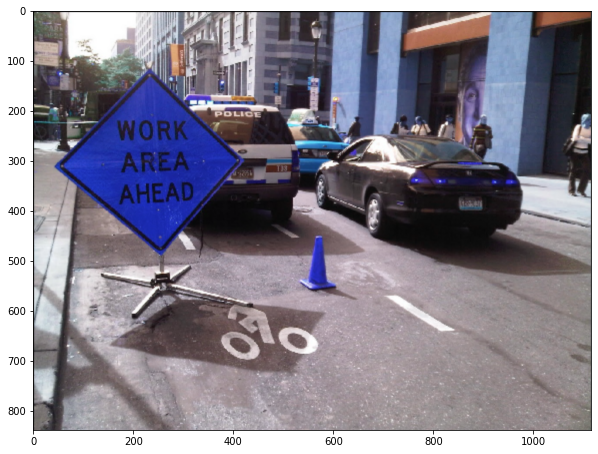

In [4]:
plt.imshow(img)
plt.show()

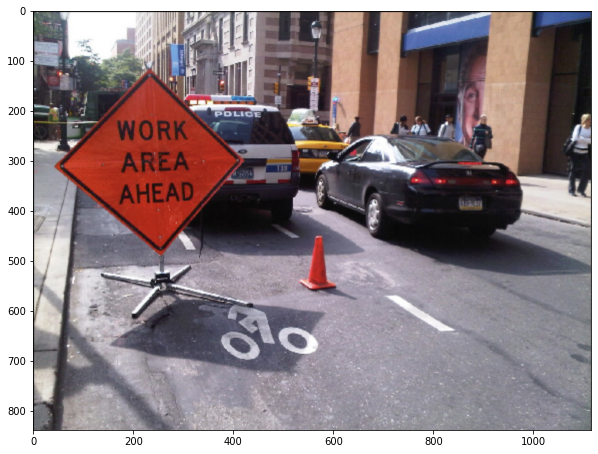

In [5]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

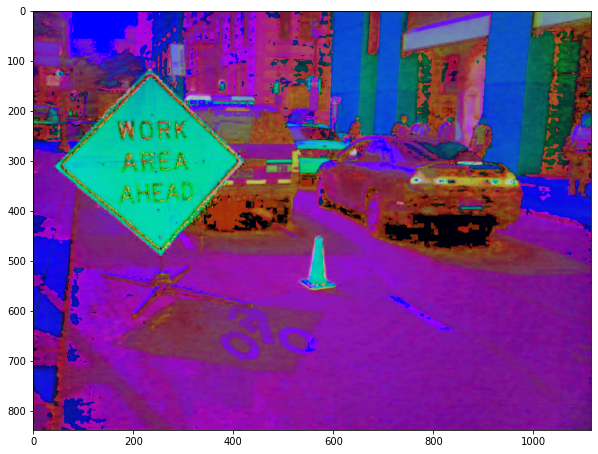

In [6]:
img_HSV = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
plt.imshow(img_HSV)
plt.show()

In [7]:
img_thresh_low = cv2.inRange(img_HSV, np.array([0, 135, 135]), np.array([15, 255, 255])) 
img_thresh_high = cv2.inRange(img_HSV, np.array([159, 135, 135]), np.array([179, 255, 255])) 
img_thresh = cv2.bitwise_or(img_thresh_low, img_thresh_high)

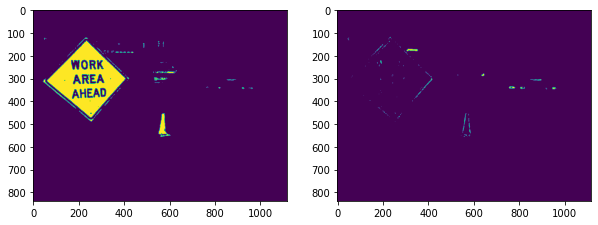

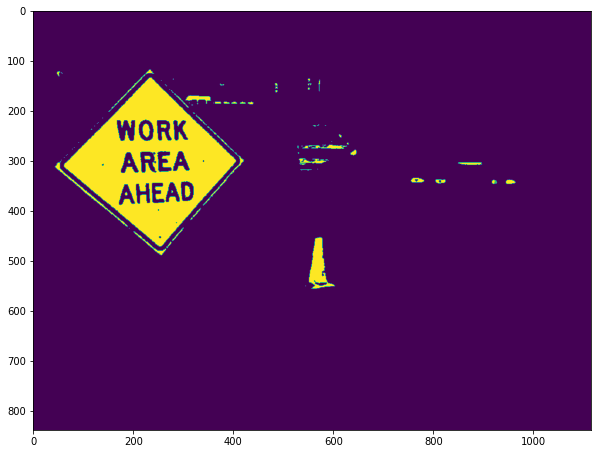

In [8]:
f, axarr = plt.subplots(nrows=1, ncols=2)
axarr[0].imshow(img_thresh_low)
axarr[1].imshow(img_thresh_high)
plt.show()

plt.imshow(img_thresh)
plt.show()

In [9]:
kernel = np.ones((5, 5))
img_thresh_opened = cv2.morphologyEx(img_thresh, cv2.MORPH_OPEN, kernel)

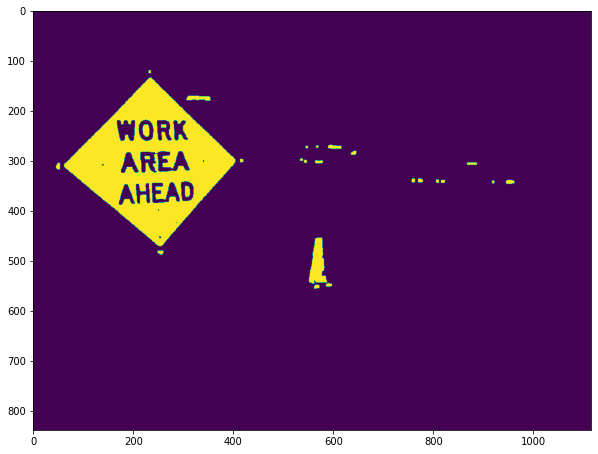

In [10]:
plt.imshow(img_thresh_opened)
plt.show()

In [11]:
img_thresh_blurred = cv2.medianBlur(img_thresh_opened, 5)

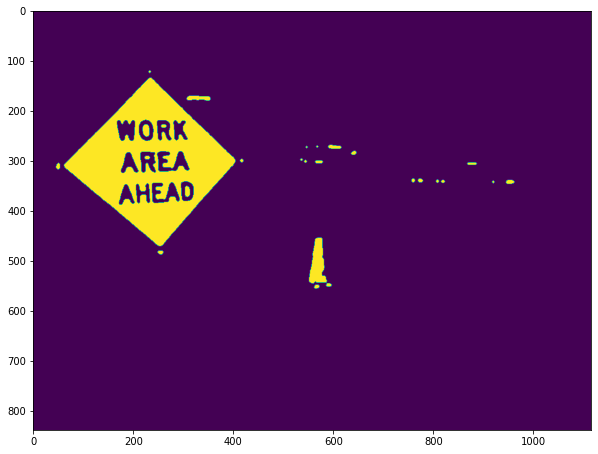

In [12]:
plt.imshow(img_thresh_blurred)
plt.show()

In [13]:
img_edges = cv2.Canny(img_thresh_blurred, 80, 160)

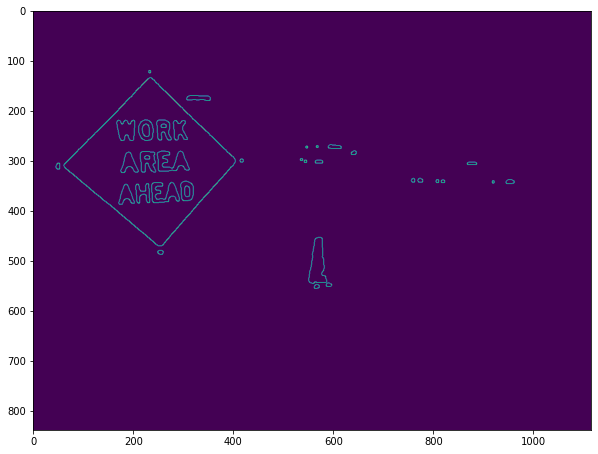

In [14]:
plt.imshow(img_edges)
plt.show()

In [15]:
contours, _ = cv2.findContours(np.array(img_edges),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

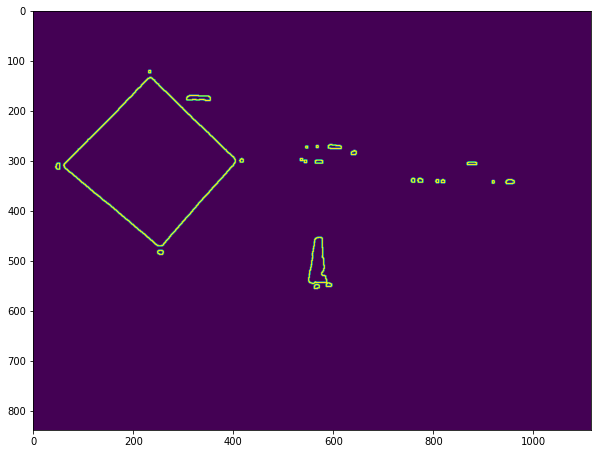

In [16]:
img_contours = np.zeros_like(img_edges)
cv2.drawContours(img_contours, contours, -1, (255,255,255), 2)
plt.imshow(img_contours)
plt.show()

In [17]:
approx_contours = []

for c in contours:
    approx = cv2.approxPolyDP(c, 10, closed = True)
    approx_contours.append(approx)

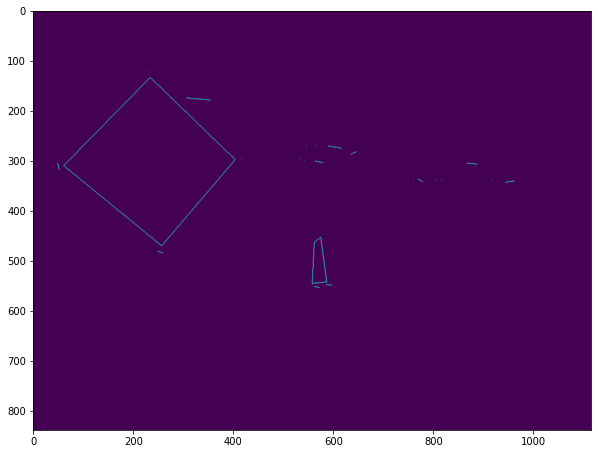

In [18]:
img_approx_contours = np.zeros_like(img_edges)
cv2.drawContours(img_approx_contours, approx_contours, -1, (255,255,255), 1)
plt.imshow(img_approx_contours)
plt.show()

In [19]:
all_convex_hulls = []
for ac in approx_contours:
    all_convex_hulls.append(cv2.convexHull(ac))

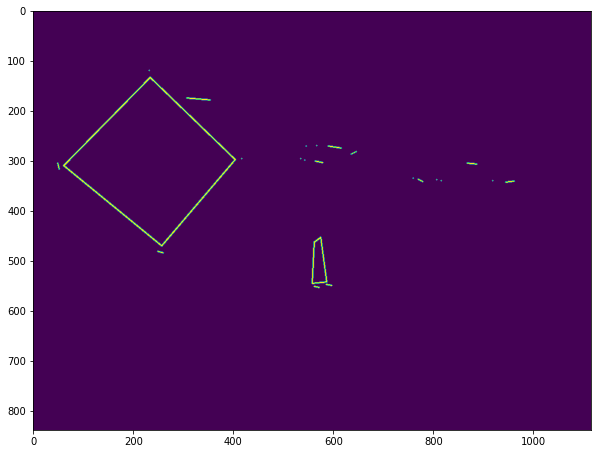

In [20]:
img_all_convex_hulls = np.zeros_like(img_edges)
cv2.drawContours(img_all_convex_hulls, all_convex_hulls, -1, (255,255,255), 2)
plt.imshow(img_all_convex_hulls)
plt.show()

In [21]:
convex_hulls_3to10 = []
for ch in all_convex_hulls:
    if 3 <= len(ch) <= 10:
        convex_hulls_3to10.append(cv2.convexHull(ch))

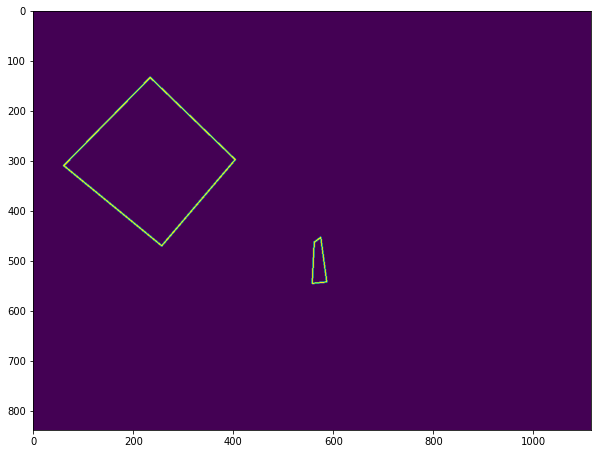

In [22]:
img_convex_hulls_3to10 = np.zeros_like(img_edges)
cv2.drawContours(img_convex_hulls_3to10, convex_hulls_3to10, -1, (255,255,255), 2)
plt.imshow(img_convex_hulls_3to10)
plt.show()

In [23]:
def convex_hull_pointing_up(ch):
        
    points_above_center, points_below_center = [], []
    
    x, y, w, h = cv2.boundingRect(ch) 
    aspect_ratio = w / h 

    if aspect_ratio < 0.8:
        vertical_center = y + h / 2

        for point in ch:
            if point[0][1] < vertical_center: 
                points_above_center.append(point)
            elif point[0][1] >= vertical_center:
                points_below_center.append(point)

        left_x = points_below_center[0][0][0]
        right_x = points_below_center[0][0][0]
        for point in points_below_center:
            if point[0][0] < left_x:
                left_x = point[0][0]
            if point[0][0] > right_x:
                right_x = point[0][0]

        for point in points_above_center:
            if (point[0][0] < left_x) or (point[0][0] > right_x):
                return False
    else:
        return False
        
    return True

In [24]:
cones = []
bounding_rects = []
for ch in convex_hulls_3to10:
    if convex_hull_pointing_up(ch):
        cones.append(ch)
        rect = cv2.boundingRect(ch)
        bounding_rects.append(rect)

In [25]:
img_cones = np.zeros_like(img_edges)
cv2.drawContours(img_cones, cones, -1, (255,255,255), 2)
cv2.drawContours(img_cones, bounding_rects, -1, (1,255,1), 2)
plt.imshow(img_cones)
plt.show()

error: OpenCV(4.5.5) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/drawing.cpp:2502: error: (-215:Assertion failed) npoints > 0 in function 'drawContours'


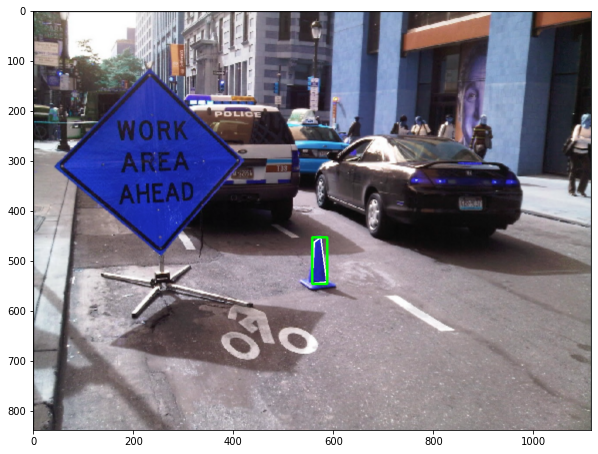

In [26]:
img_res = img.copy()
cv2.drawContours(img_res, cones, -1, (255,255,255), 2)

for rect in bounding_rects:
    cv2.rectangle(img_res, (rect[0], rect[1]), (rect[0]+rect[2], rect[1]+rect[3]), (1, 255, 1), 3)

plt.imshow(img_res)
plt.show()

In [27]:
print(str(len(bounding_rects)) + ' cone(s) found in the picture')

1 cone(s) found in the picture
